In [2]:
!pip install -q git+https://github.com/tensorflow/examples.git

  DEPRECATION: tensorflow-examples was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.


In [41]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torchvision
from torchvision.transforms import transforms
from torch.utils.data import Dataset, DataLoader, ConcatDataset

from PIL import Image
from typing import cast, Any, Union, Dict, List
import time
import random
import copy 
 
import matplotlib.pyplot as plt


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [42]:
train_df = pd.read_csv("archive/fashion-mnist_train.csv")

In [43]:
train_df=train_df.sample(10000)

In [44]:
test_df = pd.read_csv("archive/fashion-mnist_test.csv")

In [45]:
test_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [46]:
train, val = train_test_split(train_df, test_size=0.1, shuffle=True, random_state=9)

In [47]:
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
28666,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40769,6,0,0,0,0,1,0,0,16,90,...,90,86,109,30,24,149,68,11,0,0
31091,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
55279,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34762,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42471,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1059,3,0,0,0,0,0,0,0,0,0,...,97,58,0,0,0,0,0,0,0,0
43725,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26190,9,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0


In [48]:
val = test_df

In [49]:
test_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [50]:
np.max(train.iloc[:,1:].values)

255

In [51]:
sample_mean = np.mean(train.iloc[:,1:].values)/255

In [52]:
sample_std = np.std(train.iloc[:,1:].values)/255

In [53]:
aug1_transformers = transforms.Compose([
                           transforms.ToPILImage(),
                           transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
                           transforms.RandomRotation(25),
                           transforms.RandomHorizontalFlip(),
                           transforms.RandomAffine(degrees=15, translate=(0.1,0.1), scale=(0.8,0.8)),
                           transforms.ToTensor(),
                           #after calculating the mean and standard deviation.
                           transforms.Normalize((sample_mean), (sample_std)) 
])

aug2_transformers = transforms.Compose([
                           transforms.ToPILImage(),
                           transforms.RandomVerticalFlip(p=0.6),
                           transforms.RandomRotation(40),
                           transforms.RandomHorizontalFlip(p=1),
                           transforms.RandomAffine(degrees=30, translate=(0.1,0.1), scale=(0.8,0.8)),
                           transforms.ToTensor(),
                           #after calculating the mean and standard deviation.
                           transforms.Normalize((sample_mean), (sample_std)) 
])

aug3_transformers = transforms.Compose([
                           transforms.ToPILImage(),
                           transforms.RandomRotation(degrees=(-90, 90)),
                           transforms.RandomVerticalFlip(p=0.6),
                           transforms.RandomRotation(40),
                           transforms.RandomHorizontalFlip(p=0.5),
                           transforms.RandomAffine(degrees=10, translate=(0.1,0.1), scale=(0.8,0.8)),
                           transforms.ToTensor(),
                           #after calculating the mean and standard deviation.
                           transforms.Normalize((sample_mean), (sample_std)) 
])

train_transformers = transforms.Compose([
                           transforms.ToPILImage(),
                           transforms.ToTensor(),
                           #after calculating the mean and standard deviation.
                           transforms.Normalize((sample_mean), (sample_std))    
])

val_transformers = transforms.Compose([
                           transforms.ToPILImage(),
                           transforms.ToTensor(),
                           #after calculating the mean and standard deviation.
                           transforms.Normalize((sample_mean), (sample_std))
])

In [54]:
class MyDataSet(Dataset):
  def __init__(self, features, labels, Transform):
    self.x = features
    self.y = labels
    self.transform = Transform

  def __len__(self):
    return len(self.x)

  def __getitem__(self, index):
    return self.transform(self.x[index]), self.y[index]

In [55]:
def GetDf(df, Transform):
  x_train = df.iloc[:, 1:].values
  y_train = df.label.values
  x_train = x_train.reshape(-1, 1, 28, 28)
  x_train = np.uint8(x_train)
  y_train = torch.from_numpy(y_train).type(torch.LongTensor)
  x_train = torch.from_numpy(x_train)
  return MyDataSet(x_train, y_train, Transform)

In [56]:
datasets = {
    'aug1':  GetDf(train_df, aug1_transformers),
    'aug2':  GetDf(train_df, aug2_transformers),
    'aug3':  GetDf(train_df, aug3_transformers),
    'train': GetDf(train, train_transformers),
    'val': GetDf(val, val_transformers)
}

new_train = ConcatDataset([datasets['train'], datasets['aug1'], datasets['aug2'],datasets['aug3']])
# new_train = ConcatDataset([datasets['train'], datasets['aug1']])
loaders = {
    'train': DataLoader(new_train, batch_size=64, shuffle = True, num_workers=4),
    'val': DataLoader(datasets['val'], batch_size=64, shuffle = True, num_workers=4)
}


In [57]:
#for metrics
dataset_sizes = { 'train': len(new_train), 'val': len(datasets['val'])}

#for normalization
dataset_sizes_for_norm = {'train': len(datasets['train']), 'val': len(datasets['val'])}
loaders_for_norm = {
    'train': DataLoader(datasets['train'], batch_size=64, shuffle = True, num_workers=4),
    'val': DataLoader(datasets['val'], batch_size=64, shuffle = True, num_workers=4)
}

#show
dataset_sizes, dataset_sizes_for_norm

({'train': 39000, 'val': 10000}, {'train': 9000, 'val': 10000})

In [58]:
for x in ['train', 'val']:
   
  #number of pixels in the dataset = number of all pixels in one object * number of all objects in the dataset
  num_pxl = dataset_sizes_for_norm[x]*28*28
    
  #we go through the butches and sum up the pixels of the objects, 
  #which then divide the sum by the number of all pixels to calculate the average
  total_sum = 0
  for batch in loaders_for_norm[x]: total_sum += batch[0].sum()
  mean = total_sum / num_pxl

    #we calculate the standard deviation using the formula that I indicated above
  sum_sqrt = 0
  for batch in loaders_for_norm[x]: sum_sqrt += ((batch[0] - mean).pow(2)).sum()
  std = torch.sqrt(sum_sqrt / num_pxl)

#   print(f'{x} - mean: {mean}, std: {std}')

(<matplotlib.image.AxesImage at 0x7f9af4ebcee0>,
 tensor(-0.2061),
 tensor(0.9459))

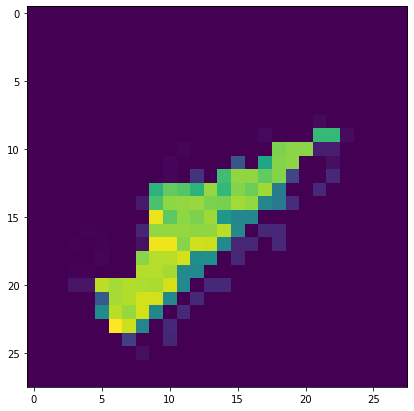

In [59]:
i = np.random.randint(50)
x, y = next(iter(loaders['train']))
plt.imshow(x[i].view(28,28),), x.mean(), x.std()

In [60]:
class VGG(nn.Module):
  def __init__(self, features:nn.Module, num_classes:int=1000, init_weights:bool=True):
      super(VGG, self).__init__()
      self.features = features #features = Feature extraction
      self.avgpool = nn.AdaptiveAvgPool2d((1,1))
      self.classifier = nn.Sequential(nn.Linear(256, num_classes))

      if init_weights:
        self.initialize_weights()
  
  def forward(self, x):
    x = self.features(x) #features = Feature extraction
    x = self.avgpool(x)
    # print(x.shape)
    x = torch.flatten(x, 1)
    x = self.classifier(x)
    return x

  def initialize_weights(self):
    for m in self.modules():
      if isinstance(m, nn.Conv2d):
        nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='leaky_relu')
        if m.bias is not None:
          nn.init.constant_(m.bias, 0) 
      if isinstance(m, nn.BatchNorm2d):
        nn.init.constant_(m.weight, 1)
        nn.init.constant_(m.bias, 0)
      if isinstance(m, nn.Linear):
        nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='leaky_relu')
        if m.bias is not None:
          nn.init.constant_(m.bias, 0) 

cfgs: Dict[str, List[Union[int, str]]] = {
    'A':[64, 'M', 128, 128, 'M', 256, 256, 256],
    'B':[16, 'M', 256, 'M'],
    'firstPadding':2
}
# cfgs: Dict[str, List[Union[str, int]]] = {
#     'A': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
#     'B': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
#     'D': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],
#     'E': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'],
# }



def make_layers(cfg:List[Union[int,str]], batch_norm:bool=False) -> nn.Sequential:
  layers:List[nn.Moduel] = []
  in_channels = 1
  in_padding = 5
  i = 0
  for v in cfg:
    if v == 'M':
      layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
    else:
      v = cast(int, v)
      in_padding = 1
      if i == 5:
        in_padding = 2
      conv2d = nn.Conv2d(in_channels, v, kernel_size=3, padding=in_padding)
      if batch_norm:
        layers += [conv2d, nn.BatchNorm2d(v), nn.PReLU(num_parameters=1)]
      else:
        layers += [conv2d, nn.PReLU(num_parameters=1)] #nn.PReLU(num_parameters=1) nn.ReLU(inplace=True)
      in_channels = v
    i += 1
  return nn.Sequential(*layers)


def selfDefineVgg(arch, cfg, batch_norm,  num_classes:int, **kwargs: Any) -> VGG:
    model = VGG(make_layers(arch[cfg], batch_norm=batch_norm), num_classes, **kwargs)
    return model
model = selfDefineVgg(cfgs, 'A', True, 10)
model = model.to(device)

In [62]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001, betas=(0.9,0.999), eps=1e-9)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 4, gamma=0.1, verbose=False)

In [63]:
#save the losses for further visualization
losses = {'train':[], 'val':[]}
accuracies = {'train':[], 'val':[]}

def train(model, criterion, optimizer, scheduler, epochs):
  since = time.time()
  best_model = copy.deepcopy(model.state_dict())
  best_acc = 0.0
  for epoch in range(epochs):
    for phase in ['train', 'val']:
      if phase == 'train':
        model.train()
      else:
        model.eval()
      
      running_loss = 0.0
      running_corrects = 0.0

      for inputs, labels in loaders[phase]:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        with torch.set_grad_enabled(phase=='train'):
          outp = model(inputs)
          _, pred = torch.max(outp, 1)
          loss = criterion(outp, labels)
        
          if phase == 'train':
            loss.backward()
            optimizer.step()
        
        running_loss += loss.item()*inputs.size(0)
        running_corrects += torch.sum(pred == labels.data)


      epoch_loss = running_loss / dataset_sizes[phase]
      epoch_acc = running_corrects.double()/dataset_sizes[phase]
      losses[phase].append(epoch_loss)
      accuracies[phase].append(epoch_acc)
      if phase == 'train':
        print('Epoch: {}/{}'.format(epoch+1, epochs))
      print('{} - loss:{}, accuracy{}'.format(phase, epoch_loss, epoch_acc))
    
      if phase == 'val':
        print('Time: {}m {}s'.format((time.time()- since)//60, (time.time()- since)%60))
            
      if phase == 'val' and epoch_acc > best_acc:
        best_acc = epoch_acc
        best_model = copy.deepcopy(model.state_dict())
    scheduler.step()  
  time_elapsed = time.time() - since
  print('Training Time {}m {}s'.format(time_elapsed//60, time_elapsed%60)) 
  print('Best accuracy {}'.format(best_acc))

  model.load_state_dict(best_model)
  return model   

In [64]:
epochs = 10
model = train(model, criterion, optimizer, scheduler, epochs)

Epoch: 1/10
train - loss:0.9889009726108648, accuracy0.6484615384615384
val - loss:0.5289912683486938, accuracy0.8079000000000001
Time: 0.0m 24.793262481689453s
Epoch: 2/10
train - loss:0.6852477467854817, accuracy0.750025641025641
val - loss:0.6633393252372741, accuracy0.7645000000000001
Time: 0.0m 49.82623100280762s
Epoch: 3/10
train - loss:0.5817901227290814, accuracy0.7892307692307692
val - loss:0.4211205891609192, accuracy0.8431000000000001
Time: 1.0m 15.033748865127563s
Epoch: 4/10
train - loss:0.5253671611394638, accuracy0.8079999999999999
val - loss:0.37183828535079955, accuracy0.8656
Time: 1.0m 40.434930086135864s
Epoch: 5/10
train - loss:0.4327457961608202, accuracy0.8391538461538461
val - loss:0.28120495781898497, accuracy0.8974000000000001
Time: 2.0m 6.357685804367065s
Epoch: 6/10
train - loss:0.4071084437798231, accuracy0.8507435897435897
val - loss:0.27076155931949614, accuracy0.9049
Time: 2.0m 32.692617893218994s
Epoch: 7/10
train - loss:0.3961537807110028, accuracy0.854

In [65]:
accuracies

{'train': [tensor(0.6485, device='cuda:0', dtype=torch.float64),
  tensor(0.7500, device='cuda:0', dtype=torch.float64),
  tensor(0.7892, device='cuda:0', dtype=torch.float64),
  tensor(0.8080, device='cuda:0', dtype=torch.float64),
  tensor(0.8392, device='cuda:0', dtype=torch.float64),
  tensor(0.8507, device='cuda:0', dtype=torch.float64),
  tensor(0.8548, device='cuda:0', dtype=torch.float64),
  tensor(0.8591, device='cuda:0', dtype=torch.float64),
  tensor(0.8665, device='cuda:0', dtype=torch.float64),
  tensor(0.8681, device='cuda:0', dtype=torch.float64)],
 'val': [tensor(0.8079, device='cuda:0', dtype=torch.float64),
  tensor(0.7645, device='cuda:0', dtype=torch.float64),
  tensor(0.8431, device='cuda:0', dtype=torch.float64),
  tensor(0.8656, device='cuda:0', dtype=torch.float64),
  tensor(0.8974, device='cuda:0', dtype=torch.float64),
  tensor(0.9049, device='cuda:0', dtype=torch.float64),
  tensor(0.9005, device='cuda:0', dtype=torch.float64),
  tensor(0.9060, device='cuda:0

In [66]:
losses

{'train': [0.9889009726108648,
  0.6852477467854817,
  0.5817901227290814,
  0.5253671611394638,
  0.4327457961608202,
  0.4071084437798231,
  0.3961537807110028,
  0.3838349681083973,
  0.3677478801378837,
  0.3620964409265763],
 'val': [0.5289912683486938,
  0.6633393252372741,
  0.4211205891609192,
  0.37183828535079955,
  0.28120495781898497,
  0.27076155931949614,
  0.27235146017074585,
  0.2702432844519615,
  0.26324991512298584,
  0.2629939652442932]}

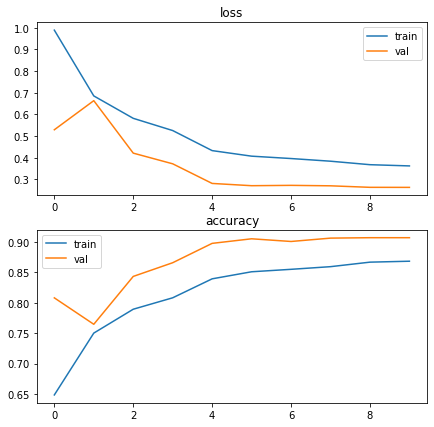

In [67]:
from pylab import rcParams
rcParams['figure.figsize'] = 7, 7

fig, axs = plt.subplots(2)

axs[0].plot([x for x in range(epochs)], losses['train'], label ='train')
axs[0].plot([x for x in range(epochs)], losses['val'], label='val')
axs[0].set_title('loss')
axs[0].legend()

axs[1].plot([x for x in range(epochs)], [y.cpu() for y in accuracies['train']], label ='train')
axs[1].plot([x for x in range(epochs)], [y.cpu() for y in accuracies['val']], label='val')
axs[1].set_title('accuracy')
axs[1].legend()